

# Comparing Books and Articles

##### Importing Libraries

In [1]:
from __future__ import division
import nltk
import string
import os
from nltk.corpus import stopwords
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

## Defining Functions

In [2]:
def ngram_compare_files(file1,file2,n):
    # Takes two files
    # hashes their n-grams into twos lists
    # calculates the intersection and union
    # of the two lists, and returns
    # Jacard similarity value
 
    stop = stopwords.words('english')
    f1 = open(file1)
    raw = f1.read()
    f1.close()
    f1_grams = nltk.ngrams(raw.split(),n)
    
    array_1 = []
    
    for gram in f1_grams:
        array_1.append(hash(gram))
    f2 = open(file2)
    raw = f2.read()
    f2.close()
    f2_grams = nltk.ngrams(raw.split(),n)
    
    array_2 = []
    
    for gram in f2_grams:
        array_2.append(hash(gram))
        
    intersection = len(list(set(array_1).intersection(array_2)))    
    union = len(set(array_1)) + len(set(array_2)) - intersection
    jacard_similarity = intersection / union
    return jacard_similarity


def pairs_of_files(directory):
    # returns combination of two files given
    # all files in a directory
    
    dir = os.listdir(directory)
    combo = combinations(dir, 2)
    return combo

def compare_files(directory,ngram_size,threshold):
    # compares all pairs of files in a directory
    # for similarity.
    # RETURNS: Dictionary, with key as
    # comma-separated string of two files
    # and value of similarity index as decimal
    # where similarity index is above threshold
    # value.
    
    compare_dictionary = {}
    
    ngram = ngram_size
    combo = pairs_of_files(directory)
    
    for i in combo:
        
        sim = ngram_compare_files(directory+str(i[0]),directory+str(i[1]),ngram)
        if sim > threshold:
            
            key = str(i[0]) + "," + str(i[1])
            value = sim
            compare_dictionary[key]=value
            
    return compare_dictionary            

## Choosing 'N'

In order to determine a proper N-value for a n-grams, we evaluate the impact of N over a range of 2 to 20.
We do this by repeating our similarity measure (Jaccardian similarity) for each N, and plotting similairity.

### Running for Books

In [3]:
dir = '/Users/jessicaaddai/Documents/MSCA /NLP/'

In [4]:
x = []
y = []
yall = []

for n in range(2,20):
        
    books_comparison = compare_files(dir+'Assignment 3 Books/',ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

### Plot the distributions

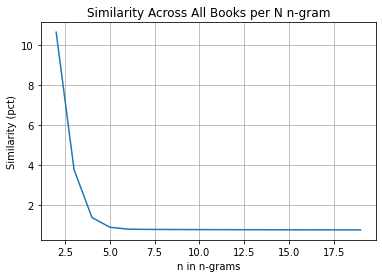

In [5]:
plt.plot(x,y, linestyle = '-')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()
plt.show()

##### n will be chosen as 4 based on the elbow in the graph being close to 4. 

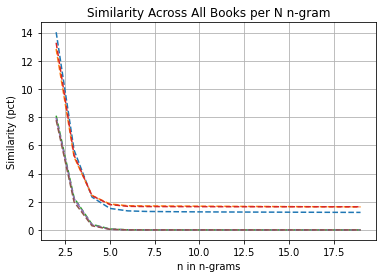

In [6]:
plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()
plt.show()

## Books measuring similarity

##### After having our n for books chosen as 4, we'll examine the similairty of our set of books, and use a threshold value of 0.0125. This threshold value will filter our any books with similarities below that value, in order to allow us to focus on the most promininent combinations of books that are similar.

In [7]:
books_comparison = compare_files(dir+'Assignment 3 Books/',ngram_size=4,threshold=0.0125)


for k,v in books_comparison.items():
    book1, book2 = k.split(',')
    similarity_index = v
    print ("1")
    print (str(book1) + " is similar to " + str(book2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

1
Adventures_of_Sherlock_Holmes.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 2.332%


1
Adventures_of_Sherlock_Holmes.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 2.444%


1
Return_of_Sherlock_Holmes.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 2.430%




In [8]:
books_comparison

{'Adventures_of_Sherlock_Holmes.txt,Return_of_Sherlock_Holmes.txt': 0.023318951117719297,
 'Adventures_of_Sherlock_Holmes.txt,Hound_of_the_Baskervilles.txt': 0.024436600597339125,
 'Return_of_Sherlock_Holmes.txt,Hound_of_the_Baskervilles.txt': 0.0243031158295003}

#### Sherlock Holmes Books (Adventures and return) are the least similar to eachother, while the most similar comparison is Adventures of Sherlock Holmes and Hound of the Baskervilles

### Running for Articles

In [9]:
x = []
y = []
yall = []

for n in range(2,20):
    
    art_comparison = compare_files(dir+'Assignment 3 Articles/',ngram_size=n,threshold=-1)
    a = np.zeros(len(art_comparison))
    counter = 0
    for key, value in art_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

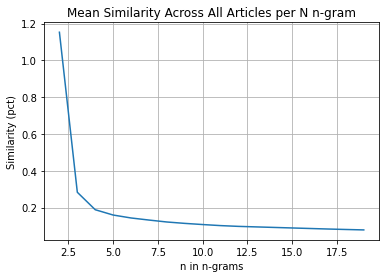

In [10]:
plt.plot(x,y, linestyle = '-')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Mean Similarity Across All Articles per N n-gram')
plt.grid()
plt.show()

#### Based on looking at the elbow/inflection point of the graph being close to 3, n would be 3. 
#### N is different for books and articles as the number of words in books is more than that of articles (books are longer than articles hence we need the N to be bigger to capture more). Hence the N is higher for books than articles. It is interesting however that the N for books is not significantly higher as there is a significant difference in length in comparison of books and articles. 

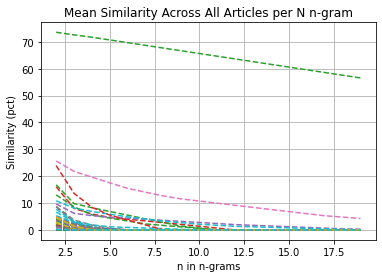

In [11]:
plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Mean Similarity Across All Articles per N n-gram')
plt.grid()
plt.show()

## Articles measuring similarity

After having our n for articles chosen as 3, we'll examine the similairty of our set of articles, and use a
threshold value of 0.001. This threshold value will filter our any articles with similarities below that value, in
order to allow us to focus on the most promininent combinations of articles that are similar.

In [12]:
articles_comparison = compare_files(dir+'Assignment 3 Articles/',ngram_size=3 ,threshold=0.001)


for k,v in articles_comparison.items():
    art1, art2 = k.split(',')
    similarity_index = v
    print (str(art1) + " is similar to " + str(art2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

article8.txt is similar to article10.txt with a Similarity Index of 0.622%


article8.txt is similar to article38.txt with a Similarity Index of 0.355%


article8.txt is similar to article14.txt with a Similarity Index of 1.277%


article8.txt is similar to article7.txt with a Similarity Index of 0.179%


article8.txt is similar to article6.txt with a Similarity Index of 0.681%


article8.txt is similar to article2.txt with a Similarity Index of 0.521%


article40.txt is similar to article9.txt with a Similarity Index of 0.419%


article40.txt is similar to article31.txt with a Similarity Index of 0.377%


article40.txt is similar to article27.txt with a Similarity Index of 0.136%


article40.txt is similar to article26.txt with a Similarity Index of 0.429%


article40.txt is similar to article32.txt with a Similarity Index of 0.383%


article40.txt is similar to article22.txt with a Similarity Index of 0.676%


article40.txt is similar to article37.txt with a Similarity Index of 0.394

In [13]:
articles_comparison

{'article8.txt,article10.txt': 0.006224066390041493,
 'article8.txt,article38.txt': 0.0035460992907801418,
 'article8.txt,article14.txt': 0.01276595744680851,
 'article8.txt,article7.txt': 0.0017921146953405018,
 'article8.txt,article6.txt': 0.0068143100511073255,
 'article8.txt,article2.txt': 0.005208333333333333,
 'article40.txt,article9.txt': 0.0041928721174004195,
 'article40.txt,article31.txt': 0.0037735849056603774,
 'article40.txt,article27.txt': 0.0013623978201634877,
 'article40.txt,article26.txt': 0.004291845493562232,
 'article40.txt,article32.txt': 0.0038314176245210726,
 'article40.txt,article22.txt': 0.006756756756756757,
 'article40.txt,article37.txt': 0.003937007874015748,
 'article40.txt,article21.txt': 0.0027247956403269754,
 'article40.txt,article39.txt': 0.0018083182640144665,
 'article40.txt,article14.txt': 0.003787878787878788,
 'article40.txt,article28.txt': 0.0038461538461538464,
 'article9.txt,article39.txt': 0.001440922190201729,
 'article9.txt,article38.txt':

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame({'Article Comparison':list(articles_comparison.keys()), 'similarity':list(articles_comparison.values())})
df.sort_values('similarity', ascending=False)

,Article Comparison,similarity
111,"article17.txt,article16.txt",0.725888
99,"article10.txt,article13.txt",0.217984
123,"article4.txt,article3.txt",0.135922
64,"article26.txt,article28.txt",0.097902
45,"article31.txt,article28.txt",0.086207
...,...,...
96,"article11.txt,article2.txt",0.001259
119,"article7.txt,article2.txt",0.001172
118,"article7.txt,article6.txt",0.001156
55,"article27.txt,article11.txt",0.001083


##### Articles 16 and 17 are the most similar to each other with a similarity index of .725888 and Articles 27 and 39 are very dissimilar as they have a low similarity index of 0.001053

## Viewing top similar articles

In [16]:
with open(os.path.join(dir+'Assignment 3 Articles/', 'article17.txt')) as f:
    print(f.read())
    
with open(os.path.join(dir+'Assignment 3 Articles/', 'article16.txt')) as f:
    print(f.read())
    

A study group said the United States
should increase its strategic petroleum reserve to one mln
barrels as one way to deal with the present and future impact
of low oil prices on the domestic oil industry.
    U.S. policy now is to raise the strategic reserve to 750
mln barrels, from its present 500 mln, to help protect the
economy from an overseas embargo or a sharp price rise.
    The Aspen Institute for Humanistic Studies, a private
group, also called for new research for oil exploration and
development techniques.
    It predicted prices would remain at about 15-18 dlrs a
barrel for several years and then rise to the mid 20s, with
imports at about 30 pct of U.S. consumption.
    The study cited two basic policy paths for the nation: to
protect the U.S. industry through an import fee or other such
device or to accept the full economic benefits of cheap oil.
    But the group did not strongly back either option, saying
there were benefits and drawbacks to both.
    It said instead th

#### The articles are very similar but article 17 has more words so it makes sense as to why the similarity index is 0.725888 because it is not exactly the same